In [3]:
import tensorflow as tf
import keras

In [4]:
import numpy as np
import pandas as pd
from keras.utils import normalize

In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [6]:
dataset_path

'/home/viole/.keras/datasets/auto-mpg.data'

In [7]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration,','Year','Origin']

In [8]:
raw_data = pd.read_csv(dataset_path, names=column_names, na_values='?', sep=' ', comment='\t', skipinitialspace=True)

In [9]:
raw_data

,MPG,Cylinders,Displacement,Horsepower,Weight,"Acceleration,",Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [10]:
df = raw_data.copy()

In [11]:
df.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,"Acceleration,",Year,Origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [12]:
df.isna()

,MPG,Cylinders,Displacement,Horsepower,Weight,"Acceleration,",Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

MPG              0
Cylinders        0
Displacement     0
Horsepower       6
Weight           0
Acceleration,    0
Year             0
Origin           0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(392, 8)

In [16]:
df.columns

Index([u'MPG', u'Cylinders', u'Displacement', u'Horsepower', u'Weight',
       u'Acceleration,', u'Year', u'Origin'],
      dtype='object')

In [17]:
df['Origin']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     3
15     1
16     1
17     1
18     3
19     2
20     2
21     2
22     2
23     2
24     1
25     1
26     1
27     1
28     1
29     3
      ..
367    1
368    1
369    1
370    1
371    1
372    1
373    1
375    2
376    3
377    3
378    1
379    1
380    3
381    3
382    3
383    3
384    3
385    3
386    1
387    1
388    1
389    1
390    3
391    1
392    1
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [18]:
origin_country_names = ['USA','Europe','Japan']
# del df['Origin']

In [19]:
df.columns

Index([u'MPG', u'Cylinders', u'Displacement', u'Horsepower', u'Weight',
       u'Acceleration,', u'Year', u'Origin'],
      dtype='object')

In [20]:
origin = df['Origin']
origin

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     3
15     1
16     1
17     1
18     3
19     2
20     2
21     2
22     2
23     2
24     1
25     1
26     1
27     1
28     1
29     3
      ..
367    1
368    1
369    1
370    1
371    1
372    1
373    1
375    2
376    3
377    3
378    1
379    1
380    3
381    3
382    3
383    3
384    3
385    3
386    1
387    1
388    1
389    1
390    3
391    1
392    1
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [21]:
def map_countries_to_orign_values(df, column_name, origin_value, origin=origin):
    df[column_name]=(origin == int(origin_value))*1.0

In [22]:
map_countries_to_orign_values(df, 'USA', 1)

In [23]:
df.columns

Index([u'MPG', u'Cylinders', u'Displacement', u'Horsepower', u'Weight',
       u'Acceleration,', u'Year', u'Origin', u'USA'],
      dtype='object')

In [24]:
map_countries_to_orign_values(df, 'Europe', 2)
map_countries_to_orign_values(df, 'Japan', 3)

In [25]:
df.columns

Index([u'MPG', u'Cylinders', u'Displacement', u'Horsepower', u'Weight',
       u'Acceleration,', u'Year', u'Origin', u'USA', u'Europe', u'Japan'],
      dtype='object')

In [26]:
del df['Origin']
df.tail(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,"Acceleration,",Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [27]:
df.columns


Index([u'MPG', u'Cylinders', u'Displacement', u'Horsepower', u'Weight',
       u'Acceleration,', u'Year', u'USA', u'Europe', u'Japan'],
      dtype='object')

In [28]:
def split_data(df=df, split=0.1):
    
    total_size = df.shape[0]
    print("Total size  : ", total_size)
    test_size = int(total_size*split)
    print("Split Size : ",test_size)
    train, test = pd.DataFrame(), pd.DataFrame()
    train = df.iloc[:-test_size,:]
    test = df.iloc[:test_size:,:]
    
    print("Train data shape : ", train.shape)
    print("Test data shape : ", test.shape)
    
    return train, test

In [29]:
train, test = split_data(split=0.2)

('Total size  : ', 392)
('Split Size : ', 78)
('Train data shape : ', (314, 10))
('Test data shape : ', (78, 10))


In [30]:
import seaborn as sns

In [31]:
type(train)

pandas.core.frame.DataFrame

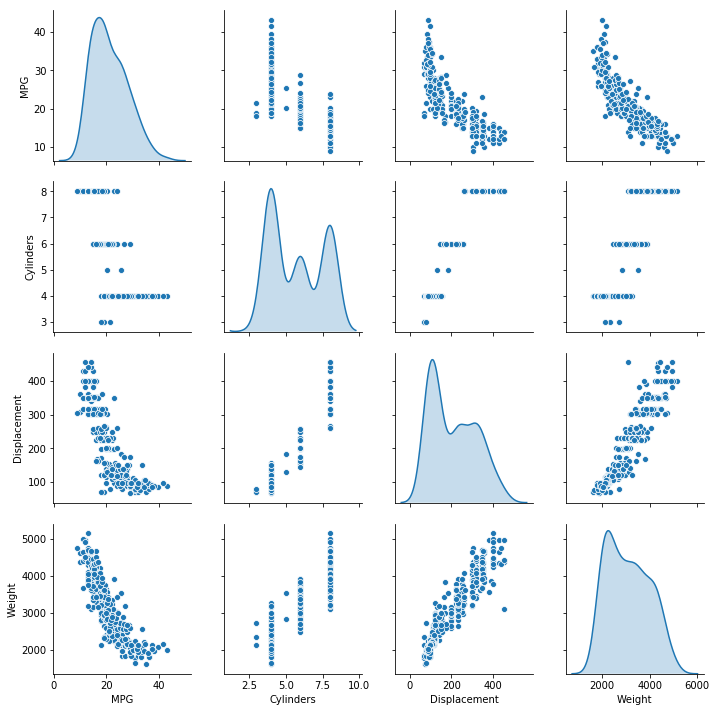

In [32]:
sns.pairplot(train[['MPG','Cylinders','Displacement','Weight']], diag_kind='kde')

In [33]:
train

,MPG,Cylinders,Displacement,Horsepower,Weight,"Acceleration,",Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0
5,15.0,8,429.0,198.0,4341.0,10.0,70,1.0,0.0,0.0
6,14.0,8,454.0,220.0,4354.0,9.0,70,1.0,0.0,0.0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1.0,0.0,0.0
8,14.0,8,455.0,225.0,4425.0,10.0,70,1.0,0.0,0.0
9,15.0,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0


In [34]:
y_tr, y_te = train.pop('MPG'), test.pop('MPG')

In [35]:
x_tr, x_te = train, test

In [36]:
tr_stats, te_stats = x_tr.describe(), x_te.describe()
tr_stats, te_stats = tr_stats.transpose(), te_stats.transpose()

In [37]:
tr_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.748408,1.752337,3.0,4.00,6.00,8.00,8.0
Displacement,314.0,210.893312,108.472795,68.0,108.50,200.00,304.75,455.0
Horsepower,314.0,110.464968,39.998008,46.0,81.00,98.00,140.00,230.0
Weight,314.0,3102.617834,880.107578,1613.0,2268.25,3007.50,3820.75,5140.0
"Acceleration,",314.0,15.287898,2.752457,8.0,13.50,15.05,17.00,24.8
Year,314.0,74.700637,2.923880,70.0,72.00,75.00,77.00,80.0
USA,314.0,0.671975,0.470244,0.0,0.00,1.00,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.00,0.00,1.0
Japan,314.0,0.149682,0.357328,0.0,0.00,0.00,0.00,1.0


In [38]:
def normalize(x, stats=tr_stats):
    return (x-stats['mean']/stats['std'])

In [39]:
normalized_tr, normalized_te = normalize(x_tr), normalize(x_te)

In [40]:
print"Input shape (test): ",len(normalized_te.keys())
print"Input shape (train): ",len(normalized_tr.keys())

Input shape (test):  9
Input shape (train):  9


In [41]:
ip_shape = len(normalized_tr.keys())

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [43]:
import matplotlib.pyplot as plt

In [52]:
model = Sequential()
model.add(Dense(1024, input_shape=[ip_shape]))
model.add(Activation('relu'))
model.add(Dense(768))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(1)) #no need for activation since we are not splitting into categories.

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae','mse'])

In [72]:
model.summary()
history = model.fit(normalized_tr, y_tr, validation_data=(normalized_te, y_te), batch_size=16, epochs=1000)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              10240     
_________________________________________________________________
activation_5 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 768)               787200    
_________________________________________________________________
activation_6 (Activation)    (None, 768)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               393728    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
__________

Epoch 30/1000
314/314 [==============================] - 0s 1ms/step - loss: 8.3917 - mean_absolute_error: 2.2342 - mean_squared_error: 8.3917 - val_loss: 4.9000 - val_mean_absolute_error: 1.6806 - val_mean_squared_error: 4.9000
Epoch 31/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.9292 - mean_absolute_error: 2.0525 - mean_squared_error: 6.9292 - val_loss: 3.6385 - val_mean_absolute_error: 1.5253 - val_mean_squared_error: 3.6385
Epoch 32/1000
314/314 [==============================] - 0s 2ms/step - loss: 6.6235 - mean_absolute_error: 1.9913 - mean_squared_error: 6.6235 - val_loss: 4.6275 - val_mean_absolute_error: 1.6204 - val_mean_squared_error: 4.6275
Epoch 33/1000
314/314 [==============================] - 1s 2ms/step - loss: 7.5694 - mean_absolute_error: 2.1181 - mean_squared_error: 7.5694 - val_loss: 4.5377 - val_mean_absolute_error: 1.6151 - val_mean_squared_error: 4.5377
Epoch 34/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.5026 

Epoch 66/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.1802 - mean_absolute_error: 1.9850 - mean_squared_error: 7.1802 - val_loss: 10.8415 - val_mean_absolute_error: 2.8077 - val_mean_squared_error: 10.8415
Epoch 67/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.8771 - mean_absolute_error: 2.1833 - mean_squared_error: 7.8771 - val_loss: 15.2725 - val_mean_absolute_error: 3.3045 - val_mean_squared_error: 15.2725
Epoch 68/1000
314/314 [==============================] - 0s 2ms/step - loss: 6.9552 - mean_absolute_error: 2.0167 - mean_squared_error: 6.9552 - val_loss: 16.7185 - val_mean_absolute_error: 3.5785 - val_mean_squared_error: 16.7185
Epoch 69/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.7969 - mean_absolute_error: 2.1942 - mean_squared_error: 7.7969 - val_loss: 5.9519 - val_mean_absolute_error: 1.8436 - val_mean_squared_error: 5.9519
Epoch 70/1000
314/314 [==============================] - 0s 1ms/step - loss: 7

Epoch 102/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.9207 - mean_absolute_error: 2.0195 - mean_squared_error: 6.9207 - val_loss: 4.4341 - val_mean_absolute_error: 1.4991 - val_mean_squared_error: 4.4341
Epoch 103/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.9899 - mean_absolute_error: 1.9892 - mean_squared_error: 6.9899 - val_loss: 3.9619 - val_mean_absolute_error: 1.5418 - val_mean_squared_error: 3.9619
Epoch 104/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.4062 - mean_absolute_error: 2.0939 - mean_squared_error: 7.4062 - val_loss: 5.3192 - val_mean_absolute_error: 1.7773 - val_mean_squared_error: 5.3192
Epoch 105/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.9994 - mean_absolute_error: 2.0555 - mean_squared_error: 6.9994 - val_loss: 6.8298 - val_mean_absolute_error: 2.0446 - val_mean_squared_error: 6.8298
Epoch 106/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.

314/314 [==============================] - 0s 1ms/step - loss: 7.5262 - mean_absolute_error: 2.1430 - mean_squared_error: 7.5262 - val_loss: 3.9646 - val_mean_absolute_error: 1.6793 - val_mean_squared_error: 3.9646
Epoch 138/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.3847 - mean_absolute_error: 1.9496 - mean_squared_error: 6.3847 - val_loss: 3.1390 - val_mean_absolute_error: 1.3412 - val_mean_squared_error: 3.1390
Epoch 139/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.1023 - mean_absolute_error: 2.0658 - mean_squared_error: 7.1023 - val_loss: 6.4240 - val_mean_absolute_error: 2.0285 - val_mean_squared_error: 6.4240
Epoch 140/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.5878 - mean_absolute_error: 2.1059 - mean_squared_error: 7.5878 - val_loss: 3.5189 - val_mean_absolute_error: 1.4862 - val_mean_squared_error: 3.5189
Epoch 141/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.1412 - mean_abs

Epoch 173/1000
314/314 [==============================] - 1s 2ms/step - loss: 7.7878 - mean_absolute_error: 2.1140 - mean_squared_error: 7.7878 - val_loss: 9.8251 - val_mean_absolute_error: 2.6216 - val_mean_squared_error: 9.8251
Epoch 174/1000
314/314 [==============================] - 1s 2ms/step - loss: 7.2985 - mean_absolute_error: 2.1275 - mean_squared_error: 7.2985 - val_loss: 4.3686 - val_mean_absolute_error: 1.6421 - val_mean_squared_error: 4.3686
Epoch 175/1000
314/314 [==============================] - 1s 2ms/step - loss: 7.3389 - mean_absolute_error: 2.1189 - mean_squared_error: 7.3389 - val_loss: 3.3343 - val_mean_absolute_error: 1.4387 - val_mean_squared_error: 3.3343
Epoch 176/1000
314/314 [==============================] - 1s 2ms/step - loss: 7.2663 - mean_absolute_error: 2.0588 - mean_squared_error: 7.2663 - val_loss: 3.0940 - val_mean_absolute_error: 1.4418 - val_mean_squared_error: 3.0940
Epoch 177/1000
314/314 [==============================] - 1s 2ms/step - loss: 7.

314/314 [==============================] - 1s 2ms/step - loss: 6.6846 - mean_absolute_error: 1.9746 - mean_squared_error: 6.6846 - val_loss: 7.8150 - val_mean_absolute_error: 2.2161 - val_mean_squared_error: 7.8150
Epoch 209/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.6157 - mean_absolute_error: 1.9508 - mean_squared_error: 6.6157 - val_loss: 4.1337 - val_mean_absolute_error: 1.6901 - val_mean_squared_error: 4.1337
Epoch 210/1000
314/314 [==============================] - 1s 2ms/step - loss: 7.1405 - mean_absolute_error: 2.0972 - mean_squared_error: 7.1405 - val_loss: 5.2829 - val_mean_absolute_error: 1.7292 - val_mean_squared_error: 5.2829
Epoch 211/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.5658 - mean_absolute_error: 1.9408 - mean_squared_error: 6.5658 - val_loss: 4.9251 - val_mean_absolute_error: 1.6027 - val_mean_squared_error: 4.9251
Epoch 212/1000
314/314 [==============================] - 1s 2ms/step - loss: 7.5410 - mean_abs

Epoch 244/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.8870 - mean_absolute_error: 2.1448 - mean_squared_error: 7.8870 - val_loss: 4.9354 - val_mean_absolute_error: 1.6011 - val_mean_squared_error: 4.9354
Epoch 245/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.9389 - mean_absolute_error: 2.1906 - mean_squared_error: 7.9389 - val_loss: 8.0315 - val_mean_absolute_error: 2.1973 - val_mean_squared_error: 8.0315
Epoch 246/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.9789 - mean_absolute_error: 1.8934 - mean_squared_error: 5.9789 - val_loss: 8.2991 - val_mean_absolute_error: 2.4022 - val_mean_squared_error: 8.2991
Epoch 247/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.6023 - mean_absolute_error: 1.9845 - mean_squared_error: 6.6023 - val_loss: 3.5680 - val_mean_absolute_error: 1.4491 - val_mean_squared_error: 3.5680
Epoch 248/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.

314/314 [==============================] - 0s 1ms/step - loss: 6.4612 - mean_absolute_error: 1.9577 - mean_squared_error: 6.4612 - val_loss: 4.4962 - val_mean_absolute_error: 1.6937 - val_mean_squared_error: 4.4962
Epoch 280/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.6605 - mean_absolute_error: 1.8571 - mean_squared_error: 5.6605 - val_loss: 18.0548 - val_mean_absolute_error: 3.7839 - val_mean_squared_error: 18.0548
Epoch 281/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.1689 - mean_absolute_error: 1.9722 - mean_squared_error: 6.1689 - val_loss: 2.8125 - val_mean_absolute_error: 1.3163 - val_mean_squared_error: 2.8125
Epoch 282/1000
314/314 [==============================] - 1s 2ms/step - loss: 7.6592 - mean_absolute_error: 2.1420 - mean_squared_error: 7.6592 - val_loss: 10.1529 - val_mean_absolute_error: 2.6702 - val_mean_squared_error: 10.1529
Epoch 283/1000
314/314 [==============================] - 1s 2ms/step - loss: 5.8002 - mean

Epoch 315/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.1796 - mean_absolute_error: 2.0686 - mean_squared_error: 7.1796 - val_loss: 3.3624 - val_mean_absolute_error: 1.4956 - val_mean_squared_error: 3.3624
Epoch 316/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.2900 - mean_absolute_error: 1.8872 - mean_squared_error: 6.2900 - val_loss: 2.8616 - val_mean_absolute_error: 1.3079 - val_mean_squared_error: 2.8616
Epoch 317/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.9492 - mean_absolute_error: 1.8809 - mean_squared_error: 5.9492 - val_loss: 3.7992 - val_mean_absolute_error: 1.6199 - val_mean_squared_error: 3.7992
Epoch 318/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.5296 - mean_absolute_error: 2.0738 - mean_squared_error: 7.5296 - val_loss: 3.5285 - val_mean_absolute_error: 1.4792 - val_mean_squared_error: 3.5285
Epoch 319/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.

314/314 [==============================] - 1s 2ms/step - loss: 6.8161 - mean_absolute_error: 2.0038 - mean_squared_error: 6.8161 - val_loss: 3.0248 - val_mean_absolute_error: 1.4329 - val_mean_squared_error: 3.0248
Epoch 351/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.0220 - mean_absolute_error: 2.0628 - mean_squared_error: 7.0220 - val_loss: 11.0371 - val_mean_absolute_error: 2.8594 - val_mean_squared_error: 11.0371
Epoch 352/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.7205 - mean_absolute_error: 2.0233 - mean_squared_error: 6.7205 - val_loss: 3.2048 - val_mean_absolute_error: 1.4737 - val_mean_squared_error: 3.2048
Epoch 353/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.8747 - mean_absolute_error: 2.0370 - mean_squared_error: 6.8747 - val_loss: 2.9153 - val_mean_absolute_error: 1.3924 - val_mean_squared_error: 2.9153
Epoch 354/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.9703 - mean_a

Epoch 386/1000
314/314 [==============================] - 1s 2ms/step - loss: 5.9470 - mean_absolute_error: 1.8763 - mean_squared_error: 5.9470 - val_loss: 3.0856 - val_mean_absolute_error: 1.3313 - val_mean_squared_error: 3.0856
Epoch 387/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.0384 - mean_absolute_error: 1.9018 - mean_squared_error: 6.0384 - val_loss: 7.9320 - val_mean_absolute_error: 2.2822 - val_mean_squared_error: 7.9320
Epoch 388/1000
314/314 [==============================] - 0s 2ms/step - loss: 6.7062 - mean_absolute_error: 1.9235 - mean_squared_error: 6.7062 - val_loss: 2.9279 - val_mean_absolute_error: 1.3053 - val_mean_squared_error: 2.9279
Epoch 389/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.5477 - mean_absolute_error: 2.0369 - mean_squared_error: 6.5477 - val_loss: 4.0666 - val_mean_absolute_error: 1.5188 - val_mean_squared_error: 4.0666
Epoch 390/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.

314/314 [==============================] - 0s 1ms/step - loss: 6.3934 - mean_absolute_error: 2.0013 - mean_squared_error: 6.3934 - val_loss: 9.1352 - val_mean_absolute_error: 2.4852 - val_mean_squared_error: 9.1352
Epoch 422/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.2234 - mean_absolute_error: 2.0512 - mean_squared_error: 7.2234 - val_loss: 3.3979 - val_mean_absolute_error: 1.4401 - val_mean_squared_error: 3.3979
Epoch 423/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0359 - mean_absolute_error: 1.8789 - mean_squared_error: 6.0359 - val_loss: 5.4640 - val_mean_absolute_error: 1.8648 - val_mean_squared_error: 5.4640
Epoch 424/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.3082 - mean_absolute_error: 2.0441 - mean_squared_error: 7.3082 - val_loss: 2.9338 - val_mean_absolute_error: 1.3090 - val_mean_squared_error: 2.9338
Epoch 425/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.4273 - mean_abs

Epoch 457/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0584 - mean_absolute_error: 1.8908 - mean_squared_error: 6.0584 - val_loss: 3.2138 - val_mean_absolute_error: 1.3784 - val_mean_squared_error: 3.2138
Epoch 458/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0569 - mean_absolute_error: 1.8536 - mean_squared_error: 6.0569 - val_loss: 8.4743 - val_mean_absolute_error: 2.2621 - val_mean_squared_error: 8.4743
Epoch 459/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.2304 - mean_absolute_error: 2.0710 - mean_squared_error: 7.2304 - val_loss: 5.1300 - val_mean_absolute_error: 1.7754 - val_mean_squared_error: 5.1300
Epoch 460/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.1043 - mean_absolute_error: 1.7587 - mean_squared_error: 5.1043 - val_loss: 2.6967 - val_mean_absolute_error: 1.2975 - val_mean_squared_error: 2.6967
Epoch 461/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.

314/314 [==============================] - 0s 1ms/step - loss: 6.6022 - mean_absolute_error: 1.9499 - mean_squared_error: 6.6022 - val_loss: 3.9676 - val_mean_absolute_error: 1.4942 - val_mean_squared_error: 3.9676
Epoch 493/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.2189 - mean_absolute_error: 1.8958 - mean_squared_error: 6.2189 - val_loss: 3.0355 - val_mean_absolute_error: 1.3449 - val_mean_squared_error: 3.0355
Epoch 494/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.3396 - mean_absolute_error: 1.9452 - mean_squared_error: 6.3396 - val_loss: 7.3675 - val_mean_absolute_error: 2.1962 - val_mean_squared_error: 7.3675
Epoch 495/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.3516 - mean_absolute_error: 2.0899 - mean_squared_error: 7.3516 - val_loss: 11.6310 - val_mean_absolute_error: 2.8231 - val_mean_squared_error: 11.6310
Epoch 496/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0658 - mean_a

Epoch 528/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0348 - mean_absolute_error: 1.8890 - mean_squared_error: 6.0348 - val_loss: 3.5921 - val_mean_absolute_error: 1.4258 - val_mean_squared_error: 3.5921
Epoch 529/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.3075 - mean_absolute_error: 1.8594 - mean_squared_error: 6.3075 - val_loss: 7.5859 - val_mean_absolute_error: 2.3151 - val_mean_squared_error: 7.5859
Epoch 530/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.6198 - mean_absolute_error: 1.9304 - mean_squared_error: 6.6198 - val_loss: 3.7244 - val_mean_absolute_error: 1.4506 - val_mean_squared_error: 3.7244
Epoch 531/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0797 - mean_absolute_error: 1.8367 - mean_squared_error: 6.0797 - val_loss: 3.2354 - val_mean_absolute_error: 1.4835 - val_mean_squared_error: 3.2354
Epoch 532/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.

Epoch 564/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.8668 - mean_absolute_error: 2.0466 - mean_squared_error: 6.8668 - val_loss: 3.0271 - val_mean_absolute_error: 1.3331 - val_mean_squared_error: 3.0271
Epoch 565/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0864 - mean_absolute_error: 1.8565 - mean_squared_error: 6.0864 - val_loss: 4.8979 - val_mean_absolute_error: 1.6324 - val_mean_squared_error: 4.8979
Epoch 566/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.8530 - mean_absolute_error: 1.8701 - mean_squared_error: 5.8530 - val_loss: 4.0524 - val_mean_absolute_error: 1.6561 - val_mean_squared_error: 4.0524
Epoch 567/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.7675 - mean_absolute_error: 1.9468 - mean_squared_error: 6.7675 - val_loss: 3.1910 - val_mean_absolute_error: 1.3887 - val_mean_squared_error: 3.1910
Epoch 568/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.

Epoch 600/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.3252 - mean_absolute_error: 1.9075 - mean_squared_error: 6.3252 - val_loss: 2.6903 - val_mean_absolute_error: 1.2938 - val_mean_squared_error: 2.6903
Epoch 601/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.8398 - mean_absolute_error: 1.8273 - mean_squared_error: 5.8398 - val_loss: 5.0702 - val_mean_absolute_error: 1.7521 - val_mean_squared_error: 5.0702
Epoch 602/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.9741 - mean_absolute_error: 2.0356 - mean_squared_error: 6.9741 - val_loss: 7.2300 - val_mean_absolute_error: 2.1495 - val_mean_squared_error: 7.2300
Epoch 603/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0222 - mean_absolute_error: 1.8822 - mean_squared_error: 6.0222 - val_loss: 2.9790 - val_mean_absolute_error: 1.4330 - val_mean_squared_error: 2.9790
Epoch 604/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.

314/314 [==============================] - 1s 2ms/step - loss: 7.1731 - mean_absolute_error: 2.0773 - mean_squared_error: 7.1731 - val_loss: 8.9069 - val_mean_absolute_error: 2.4251 - val_mean_squared_error: 8.9069
Epoch 636/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.3579 - mean_absolute_error: 1.9544 - mean_squared_error: 6.3579 - val_loss: 3.0903 - val_mean_absolute_error: 1.3410 - val_mean_squared_error: 3.0903
Epoch 637/1000
314/314 [==============================] - 1s 2ms/step - loss: 5.8980 - mean_absolute_error: 1.8732 - mean_squared_error: 5.8980 - val_loss: 6.8937 - val_mean_absolute_error: 2.0521 - val_mean_squared_error: 6.8937
Epoch 638/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.1754 - mean_absolute_error: 1.7046 - mean_squared_error: 5.1754 - val_loss: 9.4907 - val_mean_absolute_error: 2.6110 - val_mean_squared_error: 9.4907
Epoch 639/1000
314/314 [==============================] - 1s 2ms/step - loss: 6.7450 - mean_abs

Epoch 671/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0421 - mean_absolute_error: 1.9182 - mean_squared_error: 6.0421 - val_loss: 4.8577 - val_mean_absolute_error: 1.5804 - val_mean_squared_error: 4.8577
Epoch 672/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.8324 - mean_absolute_error: 1.9057 - mean_squared_error: 5.8324 - val_loss: 9.6894 - val_mean_absolute_error: 2.5693 - val_mean_squared_error: 9.6894
Epoch 673/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.3697 - mean_absolute_error: 2.0417 - mean_squared_error: 7.3697 - val_loss: 4.1195 - val_mean_absolute_error: 1.4925 - val_mean_squared_error: 4.1195
Epoch 674/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.1016 - mean_absolute_error: 1.7429 - mean_squared_error: 5.1016 - val_loss: 3.9403 - val_mean_absolute_error: 1.6175 - val_mean_squared_error: 3.9403
Epoch 675/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.

314/314 [==============================] - 0s 1ms/step - loss: 5.6028 - mean_absolute_error: 1.7911 - mean_squared_error: 5.6028 - val_loss: 5.9379 - val_mean_absolute_error: 1.9944 - val_mean_squared_error: 5.9379
Epoch 707/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.8780 - mean_absolute_error: 1.8218 - mean_squared_error: 5.8780 - val_loss: 3.2076 - val_mean_absolute_error: 1.4441 - val_mean_squared_error: 3.2076
Epoch 708/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.2425 - mean_absolute_error: 1.9071 - mean_squared_error: 6.2425 - val_loss: 2.9668 - val_mean_absolute_error: 1.3910 - val_mean_squared_error: 2.9668
Epoch 709/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0206 - mean_absolute_error: 1.9145 - mean_squared_error: 6.0206 - val_loss: 4.2525 - val_mean_absolute_error: 1.5098 - val_mean_squared_error: 4.2525
Epoch 710/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.7510 - mean_abs

Epoch 742/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.5784 - mean_absolute_error: 1.8931 - mean_squared_error: 6.5784 - val_loss: 2.9286 - val_mean_absolute_error: 1.2872 - val_mean_squared_error: 2.9286
Epoch 743/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.6810 - mean_absolute_error: 1.8193 - mean_squared_error: 5.6810 - val_loss: 4.2538 - val_mean_absolute_error: 1.6899 - val_mean_squared_error: 4.2538
Epoch 744/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.1902 - mean_absolute_error: 2.0307 - mean_squared_error: 7.1902 - val_loss: 2.9320 - val_mean_absolute_error: 1.3538 - val_mean_squared_error: 2.9320
Epoch 745/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.8290 - mean_absolute_error: 1.8486 - mean_squared_error: 5.8290 - val_loss: 8.9438 - val_mean_absolute_error: 2.4544 - val_mean_squared_error: 8.9438
Epoch 746/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.

314/314 [==============================] - 0s 1ms/step - loss: 5.5263 - mean_absolute_error: 1.7705 - mean_squared_error: 5.5263 - val_loss: 3.1696 - val_mean_absolute_error: 1.5113 - val_mean_squared_error: 3.1696
Epoch 778/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.6271 - mean_absolute_error: 1.9333 - mean_squared_error: 6.6271 - val_loss: 5.1530 - val_mean_absolute_error: 1.7959 - val_mean_squared_error: 5.1530
Epoch 779/1000
314/314 [==============================] - 0s 2ms/step - loss: 5.2897 - mean_absolute_error: 1.7173 - mean_squared_error: 5.2897 - val_loss: 11.7869 - val_mean_absolute_error: 2.9590 - val_mean_squared_error: 11.7869
Epoch 780/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.3986 - mean_absolute_error: 1.8026 - mean_squared_error: 5.3986 - val_loss: 3.6581 - val_mean_absolute_error: 1.6121 - val_mean_squared_error: 3.6581
Epoch 781/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.3824 - mean_a

Epoch 813/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.1142 - mean_absolute_error: 1.8583 - mean_squared_error: 6.1142 - val_loss: 6.6987 - val_mean_absolute_error: 1.9382 - val_mean_squared_error: 6.6987
Epoch 814/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0880 - mean_absolute_error: 1.9312 - mean_squared_error: 6.0880 - val_loss: 3.0221 - val_mean_absolute_error: 1.3867 - val_mean_squared_error: 3.0221
Epoch 815/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.4098 - mean_absolute_error: 1.7405 - mean_squared_error: 5.4098 - val_loss: 2.8813 - val_mean_absolute_error: 1.2381 - val_mean_squared_error: 2.8813
Epoch 816/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.3140 - mean_absolute_error: 1.9010 - mean_squared_error: 6.3140 - val_loss: 4.5735 - val_mean_absolute_error: 1.6495 - val_mean_squared_error: 4.5735
Epoch 817/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.

Epoch 849/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.4692 - mean_absolute_error: 1.7865 - mean_squared_error: 5.4692 - val_loss: 2.8257 - val_mean_absolute_error: 1.3020 - val_mean_squared_error: 2.8257
Epoch 850/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.1981 - mean_absolute_error: 1.9563 - mean_squared_error: 6.1981 - val_loss: 2.7707 - val_mean_absolute_error: 1.2798 - val_mean_squared_error: 2.7707
Epoch 851/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.9168 - mean_absolute_error: 1.8819 - mean_squared_error: 5.9168 - val_loss: 7.6085 - val_mean_absolute_error: 2.1982 - val_mean_squared_error: 7.6085
Epoch 852/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.5816 - mean_absolute_error: 1.7793 - mean_squared_error: 5.5816 - val_loss: 3.3201 - val_mean_absolute_error: 1.5367 - val_mean_squared_error: 3.3201
Epoch 853/1000
314/314 [==============================] - 0s 1ms/step - loss: 7.

314/314 [==============================] - 0s 1ms/step - loss: 6.7115 - mean_absolute_error: 1.9811 - mean_squared_error: 6.7115 - val_loss: 4.2475 - val_mean_absolute_error: 1.5368 - val_mean_squared_error: 4.2475
Epoch 885/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.4258 - mean_absolute_error: 1.7935 - mean_squared_error: 5.4258 - val_loss: 2.8327 - val_mean_absolute_error: 1.3172 - val_mean_squared_error: 2.8327
Epoch 886/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.9114 - mean_absolute_error: 1.8628 - mean_squared_error: 5.9114 - val_loss: 5.3060 - val_mean_absolute_error: 1.8379 - val_mean_squared_error: 5.3060
Epoch 887/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.8299 - mean_absolute_error: 1.9009 - mean_squared_error: 5.8299 - val_loss: 3.7581 - val_mean_absolute_error: 1.4533 - val_mean_squared_error: 3.7581
Epoch 888/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.4638 - mean_abs

Epoch 920/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.1250 - mean_absolute_error: 1.8966 - mean_squared_error: 6.1250 - val_loss: 2.5824 - val_mean_absolute_error: 1.2293 - val_mean_squared_error: 2.5824
Epoch 921/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.5159 - mean_absolute_error: 1.9451 - mean_squared_error: 6.5159 - val_loss: 3.9791 - val_mean_absolute_error: 1.4408 - val_mean_squared_error: 3.9791
Epoch 922/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.4542 - mean_absolute_error: 1.7369 - mean_squared_error: 5.4542 - val_loss: 5.7757 - val_mean_absolute_error: 1.8629 - val_mean_squared_error: 5.7757
Epoch 923/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.7314 - mean_absolute_error: 1.9223 - mean_squared_error: 6.7314 - val_loss: 3.8398 - val_mean_absolute_error: 1.4924 - val_mean_squared_error: 3.8398
Epoch 924/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.

Epoch 956/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.2102 - mean_absolute_error: 1.7098 - mean_squared_error: 5.2102 - val_loss: 7.2973 - val_mean_absolute_error: 2.1693 - val_mean_squared_error: 7.2973
Epoch 957/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.0125 - mean_absolute_error: 1.7428 - mean_squared_error: 5.0125 - val_loss: 3.5955 - val_mean_absolute_error: 1.4130 - val_mean_squared_error: 3.5955
Epoch 958/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.5737 - mean_absolute_error: 1.7845 - mean_squared_error: 5.5737 - val_loss: 6.8028 - val_mean_absolute_error: 1.9736 - val_mean_squared_error: 6.8028
Epoch 959/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.6619 - mean_absolute_error: 1.9388 - mean_squared_error: 6.6619 - val_loss: 2.6627 - val_mean_absolute_error: 1.3279 - val_mean_squared_error: 2.6627
Epoch 960/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.

314/314 [==============================] - 0s 1ms/step - loss: 5.8949 - mean_absolute_error: 1.8381 - mean_squared_error: 5.8949 - val_loss: 2.6648 - val_mean_absolute_error: 1.2714 - val_mean_squared_error: 2.6648
Epoch 992/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.7279 - mean_absolute_error: 1.8388 - mean_squared_error: 5.7279 - val_loss: 5.0881 - val_mean_absolute_error: 1.6432 - val_mean_squared_error: 5.0881
Epoch 993/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.9130 - mean_absolute_error: 1.8220 - mean_squared_error: 5.9130 - val_loss: 4.5725 - val_mean_absolute_error: 1.5894 - val_mean_squared_error: 4.5725
Epoch 994/1000
314/314 [==============================] - 0s 1ms/step - loss: 5.7051 - mean_absolute_error: 1.7969 - mean_squared_error: 5.7051 - val_loss: 5.0908 - val_mean_absolute_error: 1.6887 - val_mean_squared_error: 5.0908
Epoch 995/1000
314/314 [==============================] - 0s 1ms/step - loss: 6.0414 - mean_abs

In [73]:
h = pd.DataFrame(history.history)
h['epoch']=history.epoch
h.head(5)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,7.852443,2.075877,7.852443,10.525705,2.634544,10.525705,0
1,8.164648,2.213001,8.164648,9.235327,2.448413,9.235327,1
2,6.856430,1.983848,6.856430,3.687322,1.641771,3.687322,2
3,7.458235,2.118578,7.458235,3.046791,1.426156,3.046791,3
4,7.725408,2.141753,7.725408,14.403549,3.182547,14.403549,4


In [74]:
def plot_history(history):
    h = pd.DataFrame(history.history)
    h['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epochs ==>')
    plt.ylabel('MAE (Label)')
    plt.plot(h['epoch'],h['mean_absolute_error'],label='Training Error')
    plt.plot(h['epoch'],h['val_mean_absolute_error'],label='Validation Error')
    plt.ylim([0,5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epochs ==>')
    plt.ylabel('MSE (Label - squared)')
    plt.plot(h['epoch'],h['mean_squared_error'],label='Training Error')
    plt.plot(h['epoch'],h['val_mean_squared_error'],label='Validation Error')
    plt.ylim([0,20])
    plt.legend()
    
    plt.show()

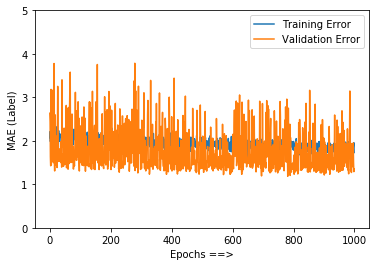

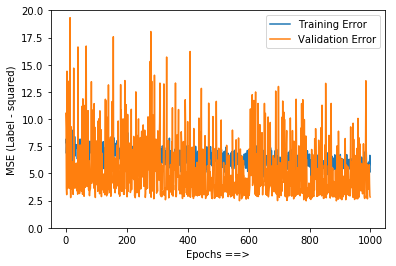

In [75]:
plot_history(history)

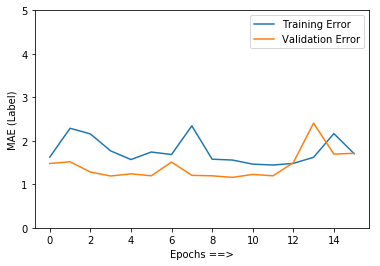

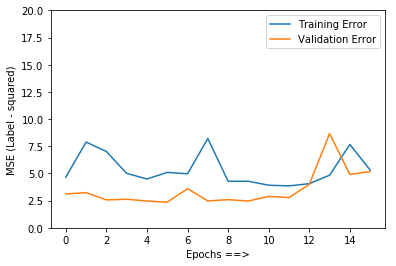

In [76]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10) #wait for 10 epochs to check for improvement
history = model.fit(normalized_tr, y_tr, validation_data = (normalized_te, y_te),
                   batch_size=256, epochs=1000, verbose=0, callbacks=[early_stop])
plot_history(history)

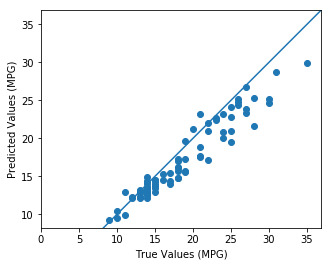

In [77]:
check_pred = model.predict(normalized_te).flatten()
plt.xlabel('True Values (MPG)')
plt.ylabel('Predicted Values (MPG)')
plt.scatter(y_te, check_pred)
plt.axis('equal'); plt.axis('square')

plt.xlim(0, plt.xlim()[1])
plt.xlim(0, plt.ylim()[1])
dummy = plt.plot([-100,100],[-100,100])

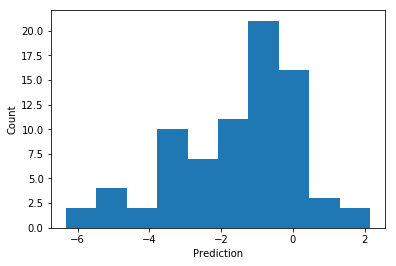

In [78]:
e = check_pred - y_te
plt.hist(e, bins=10)
plt.xlabel('Prediction')
plt.ylabel('Count')